# 1. 분석준비

In [19]:
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

In [20]:
data = pd.read_csv('clustering_data.csv')
data.drop(['Unnamed: 0'],axis = 1,inplace = True)
data

,CTY_NM,ratio,tot
0,강남구,117.501236,304
1,강동구,130.707905,201
2,강북구,255.741946,162
3,강서구,151.529412,325
4,관악구,232.544572,250
5,광진구,164.941084,158
6,구로구,180.530203,283
7,금천구,211.962286,167
8,노원구,155.835207,375
9,도봉구,214.057018,218


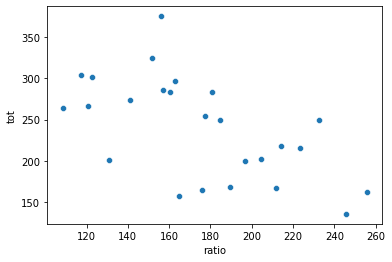

In [21]:
sns.scatterplot(x="ratio", y="tot", data=data, palette="Set2");

In [22]:
data2 = data.set_index(data['CTY_NM']).drop(['CTY_NM'],axis = 1)

# 2. 최적의 군집수 찾기

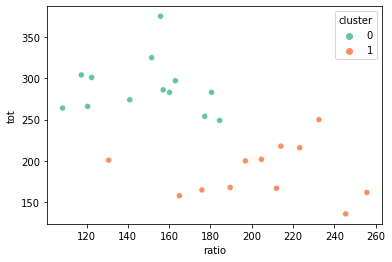

In [23]:
# k=2로 KMedoids clustering 실행
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(data2)

# 결과 확인
result_by_sklearn = data2.copy()
result_by_sklearn["cluster"] = kmedoids.labels_

result_by_sklearn.sort_values(by = 'cluster')
sns.scatterplot(x="ratio", y="tot", hue="cluster", data=result_by_sklearn, palette="Set2");

## 1) elbow method로 최적의 군집 수 찾기

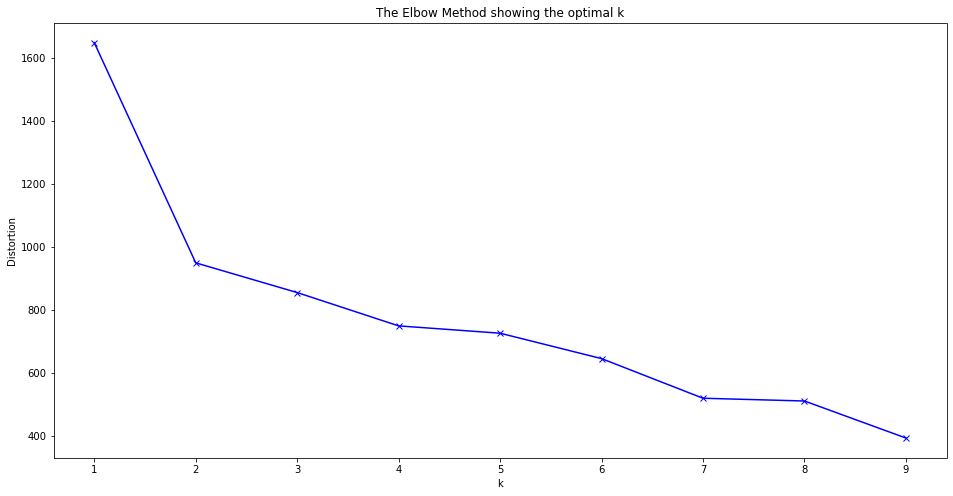

In [24]:
distortions = []

K = range(1,10)

for k in K:
    KMedoidsModel = KMedoids(n_clusters=k)
    KMedoidsModel.fit(data2)
    distortions.append(KMedoidsModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# 3. 스케일링
- 스케일링을 통해서 다른결과가 도출되는지 확인

## 1) StandardScaler 

In [25]:
from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
scaler = StandardScaler()   
scaler.fit(data2)
scaled_data = scaler.transform(data2)

In [26]:
scaled_data

#dataframe으로 만들기
StandardScaler_scaled_data = pd.DataFrame(scaled_data, columns=data2.columns, index=list(data2.index.values))
StandardScaler_scaled_data

,ratio,tot
강남구,-1.447892,1.061049
강동구,-1.117684,-0.650856
강북구,2.008557,-1.299053
강서구,-0.597081,1.410078
관악구,1.428550,0.163545
광진구,-0.261748,-1.365535
구로구,0.128029,0.712020
금천구,0.913929,-1.215951
노원구,-0.489423,2.241100
도봉구,0.966304,-0.368309


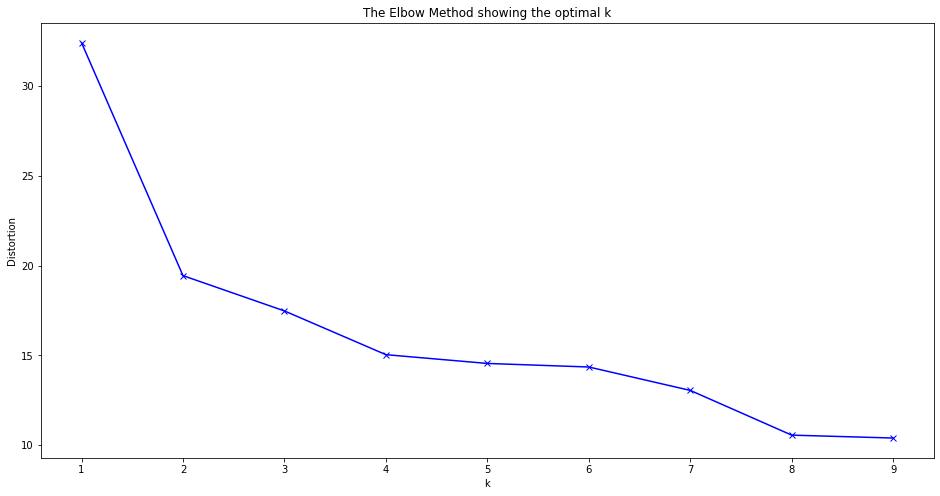

In [27]:

distortions = []

K = range(1,10)

for k in K:
    KMedoidsModel = KMedoids(n_clusters=k)
    KMedoidsModel.fit(scaled_data)
    distortions.append(KMedoidsModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## 2) MinMaxScaler

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data2)
scaled_data = min_max_scaler.transform(data2)

In [30]:
scaled_data
#dataframe으로 만들기
MinMax_scaled_data = pd.DataFrame(scaled_data, columns=data2.columns, index=list(data2.index.values))
MinMax_scaled_data


,ratio,tot
강남구,0.061907,0.702929
강동구,0.151527,0.271967
강북구,1.000000,0.108787
강서구,0.292820,0.790795
관악구,0.842584,0.476987
광진구,0.383831,0.092050
구로구,0.489618,0.615063
금천구,0.702914,0.129707
노원구,0.322039,1.000000
도봉구,0.717129,0.343096


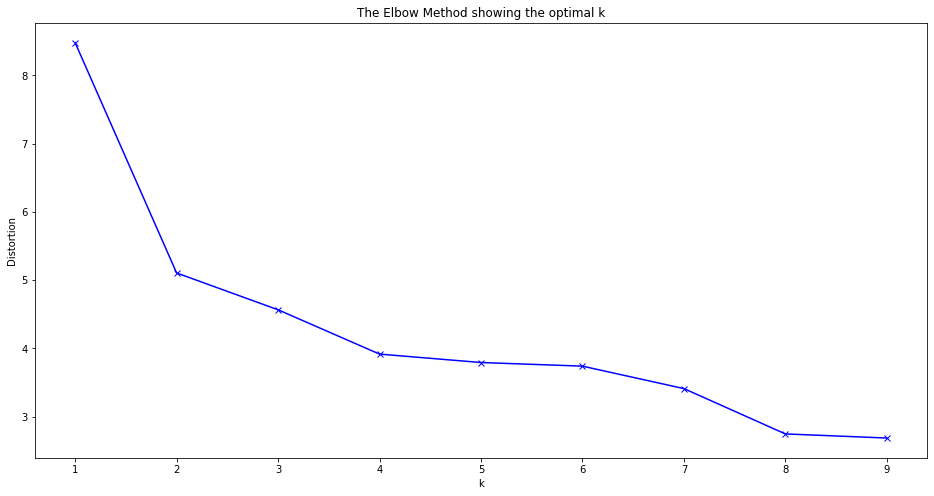

In [31]:
distortions = []

K = range(1,10)

for k in K:
    KMedoidsModel = KMedoids(n_clusters=k)
    KMedoidsModel.fit(scaled_data)
    distortions.append(KMedoidsModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

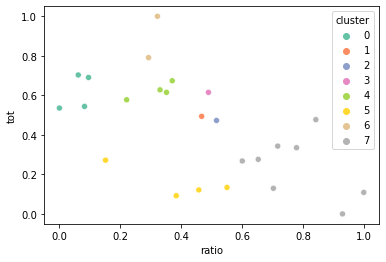

In [33]:
# k-means clustering 실행
kmedoids = KMedoids(n_clusters=8, random_state=0).fit(MinMax_scaled_data)

# 결과 확인
result_by_sklearn = MinMax_scaled_data.copy()
result_by_sklearn["cluster"] = kmedoids.labels_

result_by_sklearn.sort_values(by = 'cluster')
sns.scatterplot(x="ratio", y="tot", hue="cluster", data=result_by_sklearn, palette="Set2");

***<<<스케일링을 통해서 다른 결과가 도출될 수도 있을 것 같음>>>***

# 4. 실루엣 분석으로 최적의 군집 수 찾기

## 1) 실루엣 분석 하는법

sklearn을 이용해서 실루엣 분석

In [34]:
from sklearn.metrics import silhouette_samples, silhouette_score

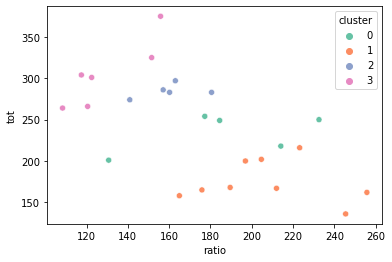

In [39]:
kmedoids = KMedoids(n_clusters=4, random_state=0).fit(data2)

# 결과 확인
result_by_sklearn = data2.copy()
result_by_sklearn["cluster"] = kmedoids.labels_

result_by_sklearn.sort_values(by = 'cluster')
sns.scatterplot(x="ratio", y="tot", hue="cluster", data=result_by_sklearn, palette="Set2");

In [40]:
score_samples = silhouette_samples(data2.to_numpy(), result_by_sklearn['cluster'])
print(score_samples.shape)
print(score_samples)

(25,)
[ 0.14888205 -0.00209019  0.39627005 -0.19889214  0.21436554  0.34716427
  0.54522985  0.50828911  0.02070642 -0.05518293  0.15593026 -0.19490952
  0.39189744  0.41102695 -0.025145    0.70191074  0.72023361  0.06725254
 -0.16887477  0.60988554  0.47466444  0.04458975 -0.13608295  0.43894631
  0.14519412]


In [41]:
# result_by_sklearn에 실루엣 계수 열 추가
result_by_sklearn['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함.  
average_score = silhouette_score(data2.to_numpy(), result_by_sklearn['cluster'])
print('데이터셋 Silhouette Analysis Score:', average_score)

데이터셋 Silhouette Analysis Score: 0.22245046015089204


In [42]:
result_by_sklearn.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.001355
1    0.304600
2    0.593831
3   -0.026012
Name: silhouette_coeff, dtype: float64

## 2) 시각화를 통해 군집의 개수 정하기

### a. 시각화 함수

In [43]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성

def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

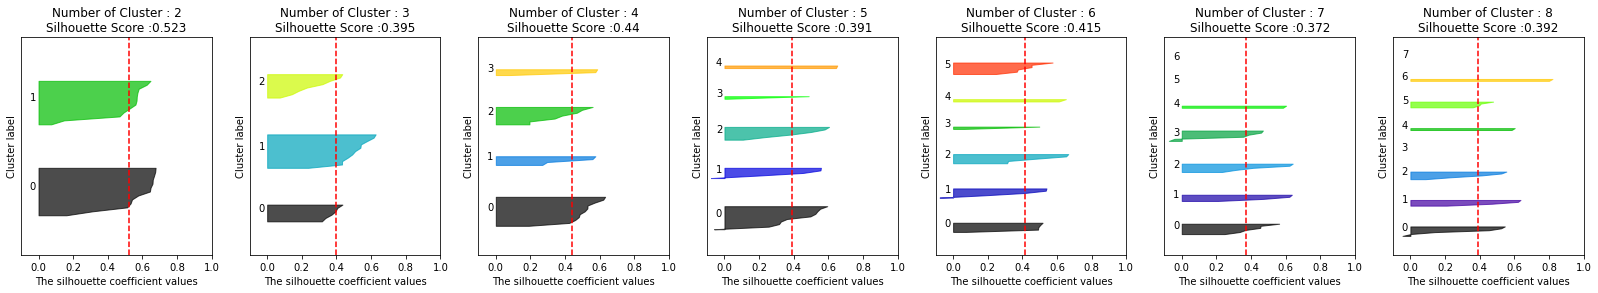

In [44]:
visualize_silhouette([2,3,4,5,6,7,8 ], data2.to_numpy())

## 3) 스케일링 한 데이터로 실루엣 분석 진행하기

- MinMax나 Standard의 차이는 크지 않아 보여서 MinMax 데이터로만 진행

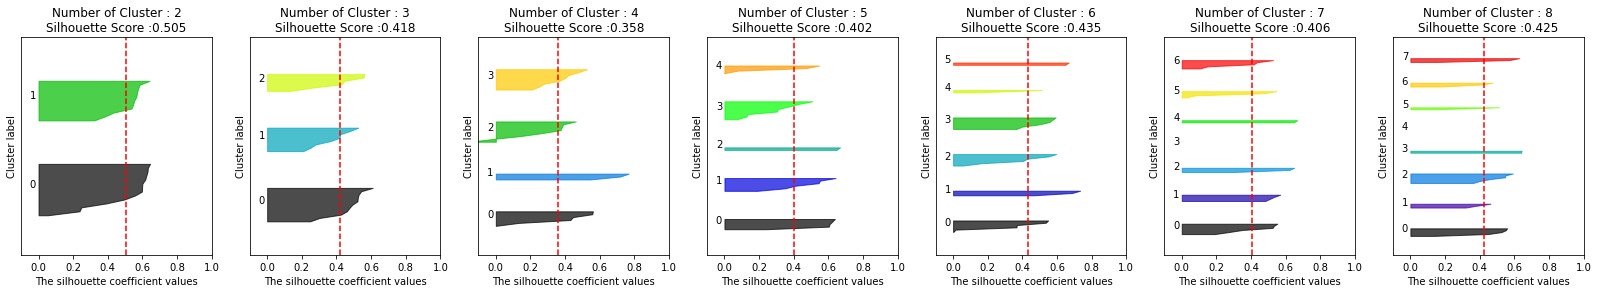

In [50]:
visualize_silhouette([2,3,4,5,6,7,8 ], MinMax_scaled_data.to_numpy())

## 4) 결과

- 결과적으로 2개의 군집으로 나누는 것이 elbow method나 sulhouette Score에서 가장 적절한 양상을 보이고 있다
- 다만 우선순위를 정하는 분석의 목적과 군집의 갯수가 적절하지 않다고 판단.
- 6, 8 군집으로 진행하는 것이 적절하다고 판단된다.
- 7,8 군집은 스케일링 전에 비해 높은 점수를 보이고 있으나 군집 중 0 이 나오는 결과가 있다.


<span style="color:red"> **6 군집은 각 군집마다 할당된 구의 수 차이가 너무 크다**</span>

<span style="color:red"> **스케일링 데이터가 더 점수가 높기 때문에 스케일링한 데이터 중 MinMax 데이터 사용**</span>

# 5. k-medoids 클러스터링

In [54]:
result_by_sklearn

,ratio,tot,cluster
강남구,0.061907,0.702929,0
강동구,0.151527,0.271967,1
강북구,1.000000,0.108787,5
강서구,0.292820,0.790795,4
관악구,0.842584,0.476987,5
광진구,0.383831,0.092050,5
구로구,0.489618,0.615063,3
금천구,0.702914,0.129707,5
노원구,0.322039,1.000000,4
도봉구,0.717129,0.343096,5


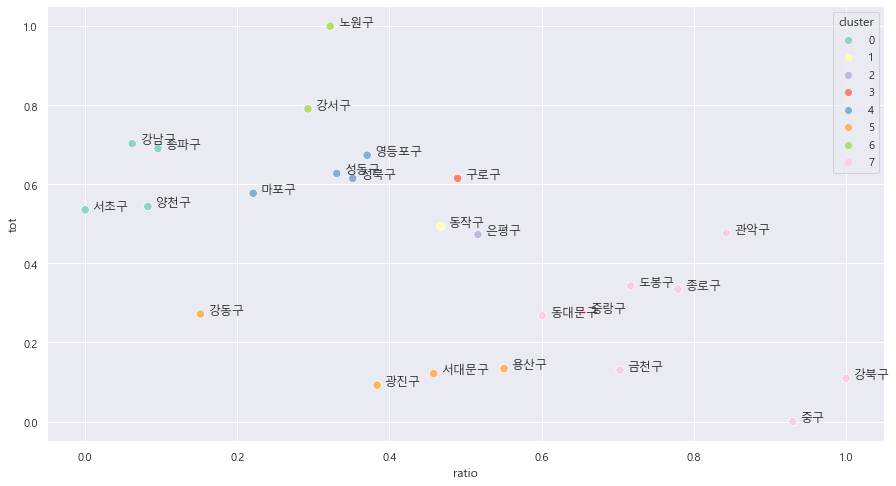

In [73]:
# k=6으로 클러스터링 진행
kmedoids = KMedoids(n_clusters=8, random_state=0).fit(MinMax_scaled_data)

# 결과 확인
result_by_sklearn = MinMax_scaled_data.copy()
result_by_sklearn["cluster"] = kmedoids.labels_



sns.set(rc = {'figure.figsize':(15,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'

ax = sns.scatterplot(x="ratio", y="tot", hue="cluster", data=result_by_sklearn, palette="Set3", s = 70)
for a,b,c in zip(result_by_sklearn.ratio, result_by_sklearn.tot, result_by_sklearn.index):
    ax.text(a+0.01, b, c)

In [74]:
result_by_sklearn.sort_values(by = 'cluster')

,ratio,tot,cluster
강남구,0.061907,0.702929,0
양천구,0.082493,0.543933,0
송파구,0.095743,0.690377,0
서초구,0.000000,0.535565,0
동작구,0.467371,0.493724,1
은평구,0.516221,0.472803,2
구로구,0.489618,0.615063,3
영등포구,0.370636,0.673640,4
성북구,0.351690,0.615063,4
성동구,0.330591,0.627615,4


- 이 데이터에서 k=6은 부적절해 보인다

- 그래서 원본데이터로 k=7로 클러스터링 해봄

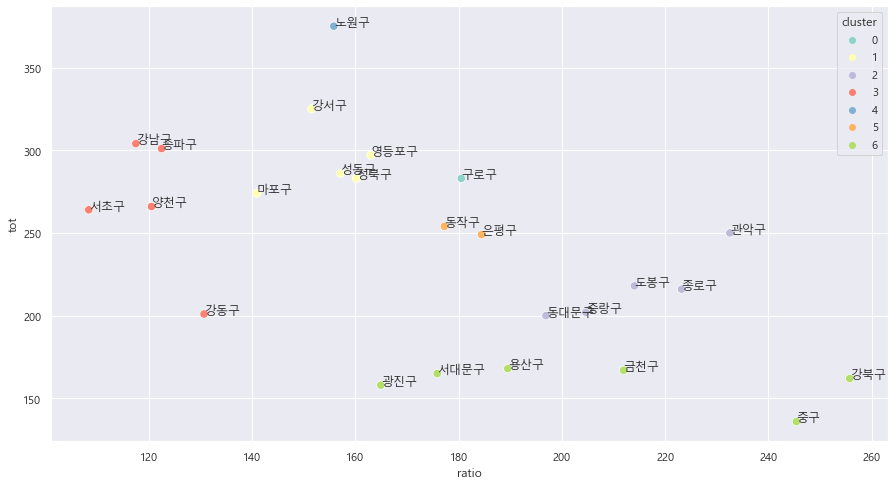

In [79]:
# k=7으로 클러스터링 진행
kmedoids = KMedoids(n_clusters=7, random_state=0).fit(data2)

# 결과 확인
result_by_sklearn = data2.copy()
result_by_sklearn["cluster"] = kmedoids.labels_



sns.set(rc = {'figure.figsize':(15,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'

ax = sns.scatterplot(x="ratio", y="tot", hue="cluster", data=result_by_sklearn, palette="Set3", s = 70)
for a,b,c in zip(result_by_sklearn.ratio, result_by_sklearn.tot, result_by_sklearn.index):
    ax.text(a+0.01, b, c)